## Video 8.2: TensorFlow and Keras

### Load libraries

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from keras.callbacks import ModelCheckpoint

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

- Images are represented as 3D arrays (height, width, color channels)
- array values range from 0 to 255
- three channels being Red, Green, Blue (RGB)
- Array shapes are (height, width, 3) e.g., (224, 224, 3)

### Load a sample image and convert to array

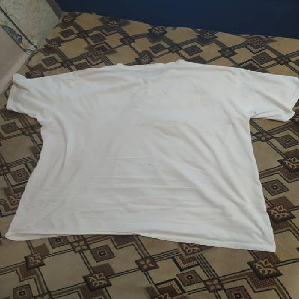

In [17]:
# load and display a resized image
image_path = '../img-dataset/train/t-shirt'
image_name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
full_name = f'{image_path}/{image_name}'
t_shirt_img = load_img(full_name, target_size=(299, 299))
t_shirt_img

In [3]:
# print the array shape - it is a 3D array of shape (299, 299, 3)
t_shirt_img = np.array(t_shirt_img)
print(f'Shape is : ', t_shirt_img.shape)

Shape is :  (299, 299, 3)


In [4]:
t_shirt_img

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

- Here values like `[100, 100,  88]` represent the RGB values for a pixel
- There are 224 x 224 pixels in this image and each has these 3 RGB values


## 8.3 Pre-Trained Convolutional Neural Networks

In [5]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

In [11]:
image_array = np.array([t_shirt_img])

# pre process as the images were trained on ImageNet
image_array = preprocess_input(image_array)

image_array

array([[[[-0.2235294 , -0.2235294 , -0.31764704],
         [-0.09019607, -0.09019607, -0.18431371],
         [-0.10588235, -0.10588235, -0.19999999],
         ...,
         [-0.81960785, -0.7647059 , -0.6392157 ],
         [-0.81960785, -0.7647059 , -0.6392157 ],
         [-0.827451  , -0.77254903, -0.64705884]],

        [[-0.16862744, -0.16862744, -0.26274508],
         [-0.05882353, -0.05882353, -0.15294117],
         [-0.04313725, -0.04313725, -0.1372549 ],
         ...,
         [-0.8117647 , -0.75686276, -0.6313726 ],
         [-0.81960785, -0.7647059 , -0.6392157 ],
         [-0.81960785, -0.7647059 , -0.6392157 ]],

        [[-0.0745098 , -0.0745098 , -0.16862744],
         [-0.01960784, -0.01960784, -0.11372548],
         [ 0.0196079 ,  0.0196079 , -0.0745098 ],
         ...,
         [-0.8039216 , -0.7490196 , -0.62352943],
         [-0.8117647 , -0.75686276, -0.6313726 ],
         [-0.8117647 , -0.75686276, -0.6313726 ]],

        ...,

        [[-0.38039213, -0.4352941 , -0

In [13]:
# predict the image class
img_prediction = model.predict(image_array)
img_prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


(1, 1000)

In [16]:
# decode the prediction to class names
decoded_prediction = decode_predictions(img_prediction)[0]
decoded_prediction

[('n03595614', 'jersey', np.float32(0.952498)),
 ('n04370456', 'sweatshirt', np.float32(0.0097887)),
 ('n04033995', 'quilt', np.float32(0.003194975)),
 ('n03710637', 'maillot', np.float32(0.0012328897)),
 ('n03188531', 'diaper', np.float32(0.001185508))]

- It is being predicted as a class of "jersey", "sweatshit" as the top 2
- It is not perfect and we can extend and train a new model for our specific classes

## 8.5 Transfer Learning

- We will use the convolutional layers of the pre-trained model but not the dense layers. This is the core idea behind transfer learning.
- Use an already trained model as a base and add new dense layers on top of it for our specific classification task.
- we will use smaller image sizes of (150, 150) for faster training

In [28]:
# create the base pre-trained model
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# create the training data generator
train_ds = train_gen.flow_from_directory('../img-dataset/train',
                              target_size=(150,150),
                              batch_size=32)

Found 3068 images belonging to 10 classes.


In [29]:
# list the class indices
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [30]:
# get a batch of training data
X,y = next(train_ds)

# display the first 5 labels for the batch from y, representing the classes
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- These values of y are one-hot encoded vectors representing the classes
- E.g., 9 represents the class "t-shirt" and 1 represents "dress"

In [31]:
# similarly create the validation data generator
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('../img-dataset/validation',
                              target_size=(150,150),
                              batch_size=32)

Found 341 images belonging to 10 classes.


In [32]:
# Model training using transfer learning
# create the base pre-trained model
base_model = Xception(weights='imagenet',
                      include_top=False, # exclude the dense layers
                      input_shape=(150,150,3))

# make it non-trainable
base_model.trainable = False



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


- network design
    - `inputs (150, 150, 3) of batch 32` ->
    - `base_model (5 x 5 x 2048) of batch 32` ->
    - `Vector 1D (2048) of batch 32` ->
    - `Outputs (10 classes) of batch 32`

In [41]:
# define the model input
inputs = keras.Input(shape=(150,150,3))

# pass the inputs through the base model, training is False to avoid updating batchnorm layers
base = base_model(inputs, training=False)

# global average pooling to get vectors from feature maps
vectors = keras.layers.GlobalAveragePooling2D()(base)

# final dense layer for classification and keep the raw logits
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,881,970 (79.66 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [43]:
preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


(32, 10)

In [44]:
preds[0]

array([0.2325174 , 0.20366986, 0.03568221, 0.09166999, 0.03808187,
       0.06766478, 0.02660752, 0.14649215, 0.06569408, 0.09192022],
      dtype=float32)

In [48]:
# Define the learning rate and optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# define the loss function with from_logits=False so that softmax is applied
loss = keras.losses.CategoricalCrossentropy(from_logits=False)

# Training the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [50]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 293ms/step - accuracy: 0.9296 - loss: 0.2606 - val_accuracy: 0.8358 - val_loss: 0.5303
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.9420 - loss: 0.2328 - val_accuracy: 0.8328 - val_loss: 0.5281
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 606ms/step - accuracy: 0.9518 - loss: 0.2084 - val_accuracy: 0.8416 - val_loss: 0.5267
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 288ms/step - accuracy: 0.9609 - loss: 0.1881 - val_accuracy: 0.8446 - val_loss: 0.5276
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 291ms/step - accuracy: 0.9658 - loss: 0.1716 - val_accuracy: 0.8446 - val_loss: 0.5298
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 296ms/step - accuracy: 0.9723 - loss: 0.1559 - val_accuracy: 0.8270 - val_loss: 0.5493
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 280ms/step - accuracy: 0.9791 - loss: 0.1420 - val_accuracy: 0.8328 - val_loss: 0.5459
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 280ms/step - accuracy: 0.9811 - loss: 0.1307 - val_accu

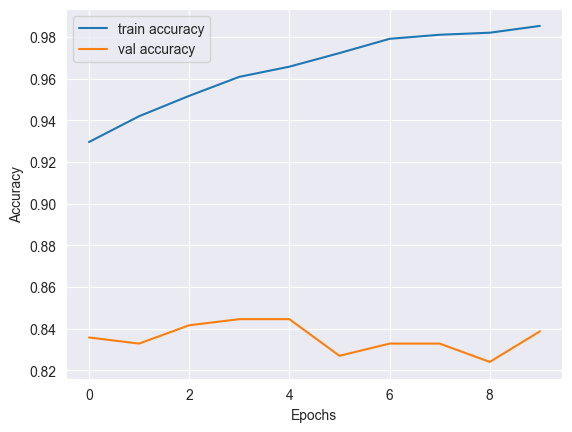

In [51]:
# Plot training and validation loss from history of model training
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Training Accuracy is nearly 100% and Validation Accuracy is around 85%
- This shows that the model is overfitting the training data
- On the validation data, it is able to generalize reasonably well
- We will adjust the learning rate to see the model performance

## 8.6 Adjusting the Learning Rate

In [73]:
def make_model(learning_rate=0.01):
    fn_base_model = Xception(
        weights='imagenet',
        include_top=False, # exclude the dense layers
        input_shape=(150,150,3)
    )
    fn_base_model.trainable = False

    # define the model input
    fn_inputs = keras.Input(shape=(150,150,3))

    # pass the inputs through the base model, training is False to avoid updating batch norm layers
    fn_base = fn_base_model(fn_inputs, training=False)

    # global average pooling to get vectors from feature maps
    fn_vectors = keras.layers.GlobalAveragePooling2D()(fn_base)

    # final dense layer for classification and keep the raw logits
    fn_outputs = keras.layers.Dense(10)(fn_vectors)

    fn_model = keras.Model(fn_inputs, fn_outputs)

    # Define the learning rate and optimizer
    fn_optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    # define the loss function with from_logits=False so that softmax is applied
    fn_loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Training the model
    fn_model.compile(optimizer=fn_optimizer,
                  loss=fn_loss,
                  metrics=['accuracy'])

    return fn_model

In [74]:
def plot_history(training_history, lr_trained):
    plt.plot(training_history.history['accuracy'], label='train accuracy')
    plt.plot(training_history.history['val_accuracy'], label='val accuracy')
    plt.title(f'Learning Rate: {lr_trained}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [75]:
scores = {}

for lr in [0.01, 0.001]:
    print(f'Training model with learning rate: {lr}')
    model = make_model(learning_rate=lr)
    fn_history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = fn_history

Training model with learning rate: 0.01
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.6718 - loss: 1.2935 - val_accuracy: 0.7771 - val_loss: 0.8373
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 273ms/step - accuracy: 0.8360 - loss: 0.5208 - val_accuracy: 0.7654 - val_loss: 0.8856
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - accuracy: 0.8644 - loss: 0.4030 - val_accuracy: 0.7742 - val_loss: 1.0000
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - accuracy: 0.9169 - loss: 0.2433 - val_accuracy: 0.7889 - val_loss: 0.9072
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 276ms/step - accuracy: 0.9485 - loss: 0.1542 - val_accuracy: 0.7947 - val_loss: 0.9406
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - accuracy: 0.9583 - loss: 0.1251 - val_accuracy: 0.7889 - val_loss: 0.8284
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 276ms/step - accuracy: 0.9720 - loss: 0.0799 - val_accuracy: 0.8006 - val_loss: 0.9152
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - ac

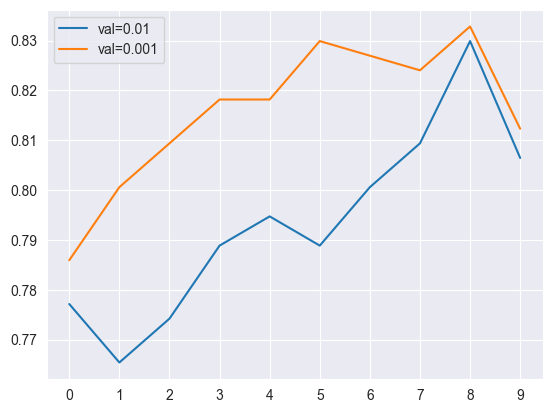

In [76]:
# Plot the validation accuracy for different learning rates
for lr_trained, history in scores.items():
    plt.plot(history.history['val_accuracy'], label=('val=%s' % lr_trained))

plt.xticks(np.arange(10))
plt.legend()
plt.show()

- val = 0.001 shows better validation accuracy than val = 0.01
- We will use learning rate of 0.001 for further training

## 8.7 Checkpointing

In [82]:
# Save the model weights
model.save_weights('model_v1.weights.h5')

In [83]:
# Define the checkpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# Recreate the model with the best learning rate
learning_rate = 0.001

# create the model
model = make_model(learning_rate=learning_rate)

# Train the model with checkpointing
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.4959 - loss: 1.4549

96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accuracy: 0.6245 - loss: 1.0892 - val_accuracy: 0.7625 - val_loss: 0.7539
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.7819 - loss: 0.6497

96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 286ms/step - accuracy: 0.7881 - loss: 0.6260 - val_accuracy: 0.7918 - val_loss: 0.6286
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8472 - loss: 0.4922

96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - accuracy: 0.8377 - loss: 0.5047 - val_accuracy: 0.8094 - val_loss: 0.5934
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - accuracy: 0.8732 - loss: 0.4230 - val_accuracy: 0.8094 - val_loss: 0.5686
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8879 - loss: 0.3650

96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 273ms/step - accuracy: 0.8924 - loss: 0.3646 - val_accuracy: 0.8211 - val_loss: 0.5520
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.9095 - loss: 0.3262

96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 288ms/step - accuracy: 0.9032 - loss: 0.3283 - val_accuracy: 0.8328 - val_loss: 0.5518
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 284ms/step - accuracy: 0.9224 - loss: 0.2831 - val_accuracy: 0.8152 - val_loss: 0.5273
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 284ms/step - accuracy: 0.9319 - loss: 0.2568 - val_accuracy: 0.8065 - val_loss: 0.5613
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 276ms/step - accuracy: 0.9462 - loss: 0.2275 - val_accuracy: 0.8123 - val_loss: 0.5711
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 282ms/step - accuracy: 0.9488 - loss: 0.2099 - val_accuracy: 0.8270 - val_loss: 0.5468


In [84]:
!ls -l *.h5

-rw-r--r--@ 1 sriram  staff  84061888 Dec  3 00:28 model_v1.weights.h5
-rw-r--r--@ 1 sriram  staff  84005248 Dec  3 00:29 xception_v1_01_0.762.h5
-rw-r--r--@ 1 sriram  staff  84005248 Dec  3 00:30 xception_v1_02_0.792.h5
-rw-r--r--@ 1 sriram  staff  84005248 Dec  3 00:30 xception_v1_03_0.809.h5
-rw-r--r--@ 1 sriram  staff  84005248 Dec  3 00:31 xception_v1_05_0.821.h5
-rw-r--r--@ 1 sriram  staff  84005248 Dec  3 00:31 xception_v1_06_0.833.h5


- From the files saved, we can see that only the best models from corresponding epochs are saved i.e., 1,2,3,5 and 6

## 8.8 Adding more layers
- Ref the actual code (not training on CPU as it consumes time)